# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [1]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-24 04:43:50--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-24 04:43:50--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmentos 

In [2]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [3]:
cantidad_clientes = len(df)
print(f"Cantidad total de clientes: {cantidad_clientes}")

Cantidad total de clientes: 15000


In [5]:
distribucion_plataforma = df['plataforma'].value_counts()
print("\nDistribución de clientes por plataforma:")
print(distribucion_plataforma)


Distribución de clientes por plataforma:
plataforma
Instagram    5972
Facebook     5288
TikTok       3740
Name: count, dtype: int64


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


In [7]:
print("Resumen estadístico de la edad:\n", df['edad'].describe())

Resumen estadístico de la edad:
 count    15000.000000
mean        33.101800
std         11.393441
min         16.000000
25%         24.000000
50%         31.000000
75%         40.000000
max         60.000000
Name: edad, dtype: float64


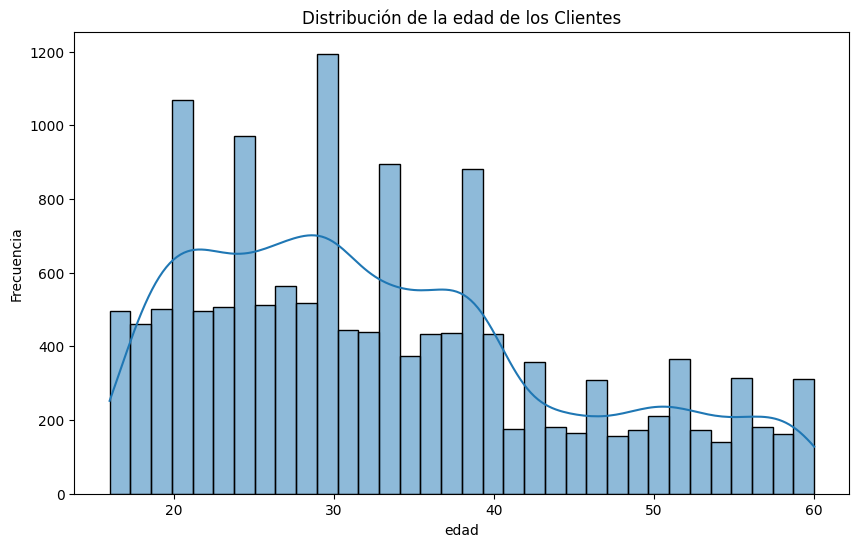

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Distribución de la edad de los Clientes')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.show()

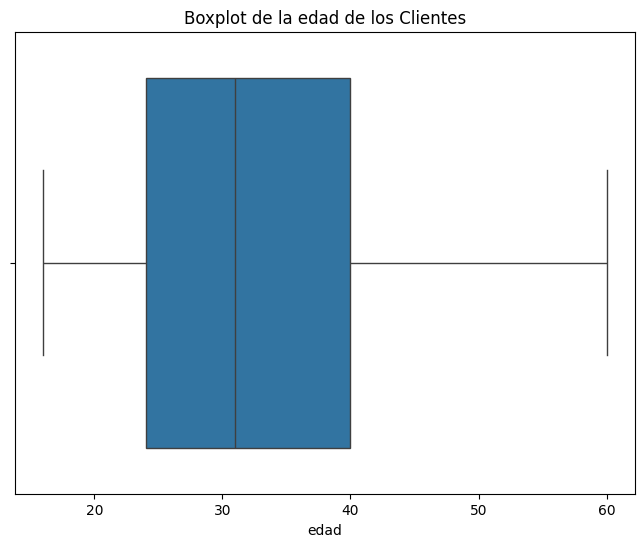

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['edad'])
plt.title('Boxplot de la edad de los Clientes')
plt.xlabel('edad')
plt.show()

### P3. ¿Existe correlación entre ingresos y total_gastado?


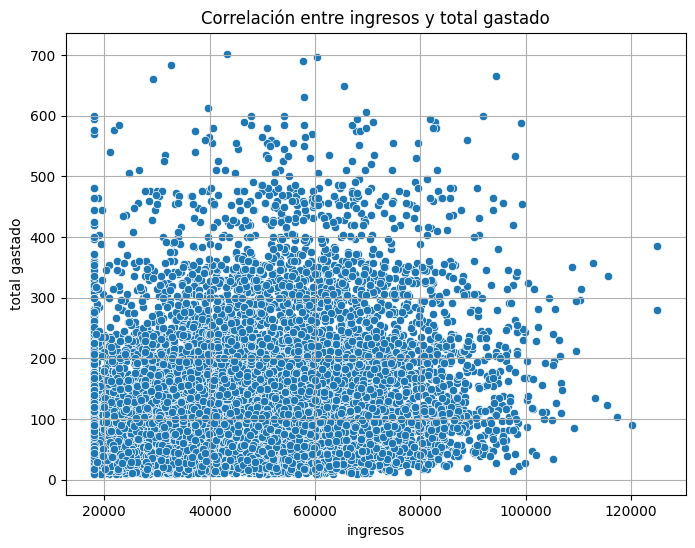

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ingresos', y='total_gastado')
plt.title('Correlación entre ingresos y total gastado')
plt.xlabel('ingresos')
plt.ylabel('total gastado')
plt.grid(True)
plt.show()

In [20]:
correlacion_pearson = df['ingresos'].corr(df['total_gastado'], method='pearson')
print(f"\nCoeficiente de correlación de Pearson: {correlacion_pearson:.3f}")


Coeficiente de correlación de Pearson: 0.255


#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [21]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


### P4. CAC vs LTV por plataforma

In [39]:
df['precio_promedio'] = df['total_gastado'] / df['compras']
df['LTV'] = df['precio_promedio'] * df['frecuencia_mensual']

In [40]:
cac_ltv_by_platform = df.groupby('plataforma').agg({'CAC': 'mean', 'LTV': 'mean'})

In [41]:
print(cac_ltv_by_platform)

             CAC        LTV
plataforma                 
Facebook    50.0  55.092580
Instagram   50.0  26.037869
TikTok      50.0  16.686795


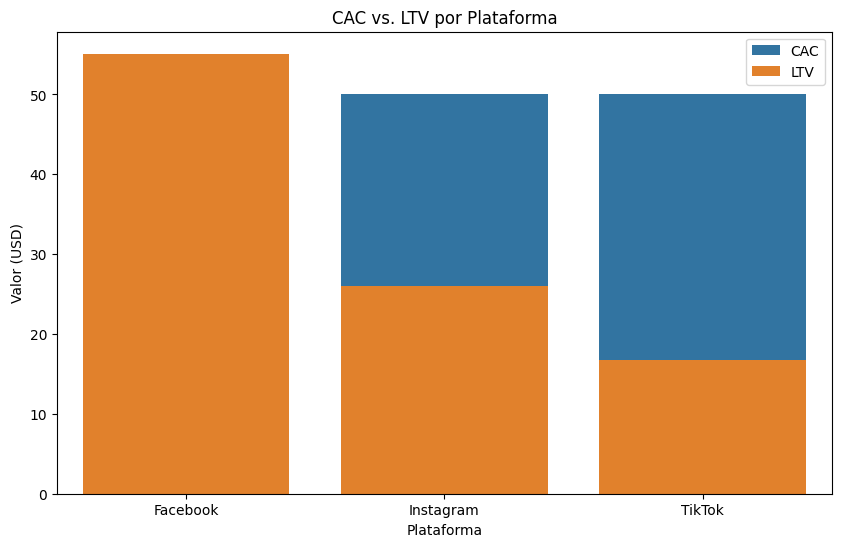

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cac_ltv_by_platform.index, y=cac_ltv_by_platform['CAC'], label='CAC')
sns.barplot(x=cac_ltv_by_platform.index, y=cac_ltv_by_platform['LTV'], label='LTV')
plt.title('CAC vs. LTV por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Valor (USD)')
plt.legend()
plt.show()

#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [43]:
from sklearn.cluster import KMeans

In [44]:
features = ['edad', 'ingresos', 'total_gastado', 'frecuencia_mensual']
X = df[features]

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [46]:
df['cluster'] = kmeans.labels_

### P5. Visualiza clusters

In [48]:
columnas_para_visualizar = ['edad', 'ingresos', 'total_gastado', 'frecuencia_mensual', 'cluster']
df_visualizacion = df[columnas_para_visualizar]

<Figure size 1000x1000 with 0 Axes>

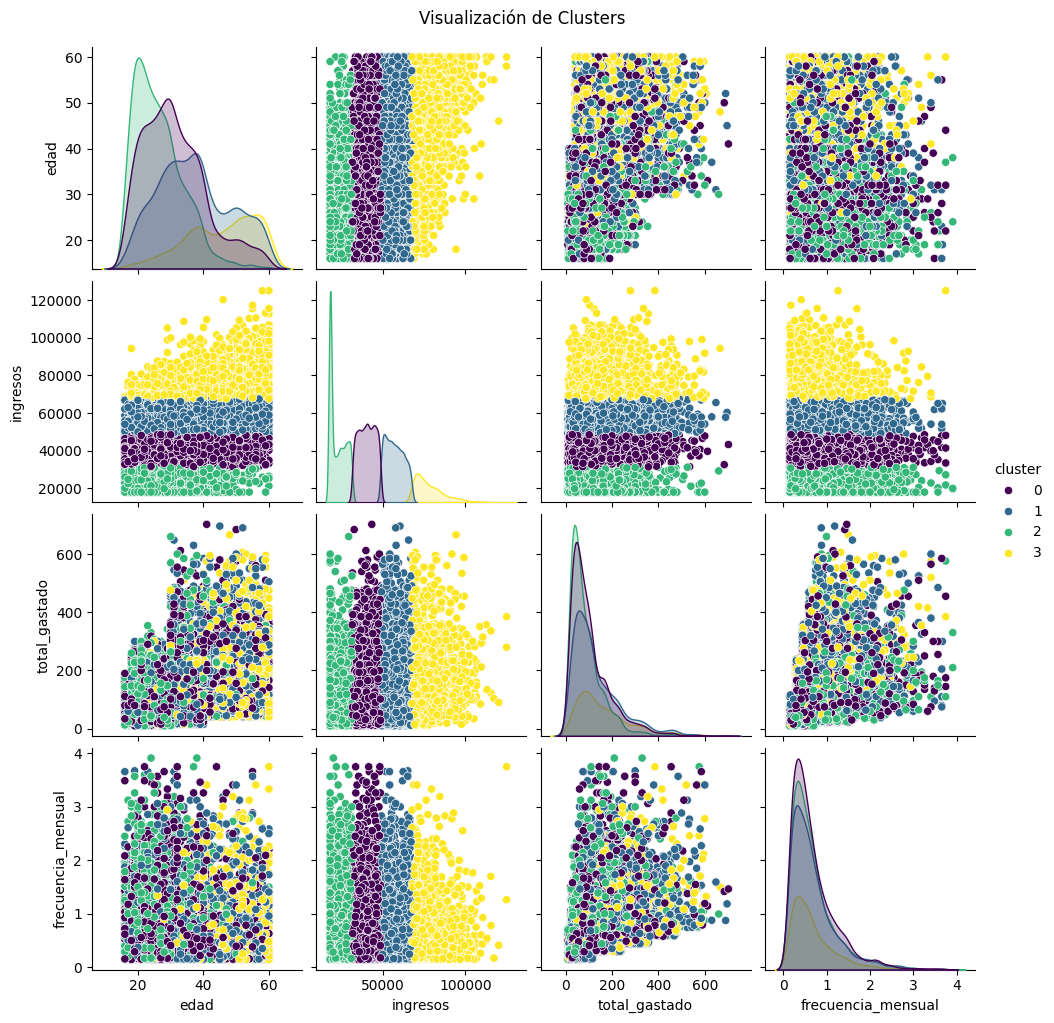

In [49]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_visualizacion, hue='cluster', palette='viridis')
plt.suptitle('Visualización de Clusters', y=1.02)
plt.show()

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [51]:
cac_por_cliente = df['plataforma'].map(cac_por_plataforma)
df['CAC'] = cac_por_cliente

In [52]:
df['Ganancia'] = df['LTV'] - df['CAC']
print(df[['LTV', 'CAC', 'Ganancia']].head())

         LTV  CAC  Ganancia
0  17.480315  NaN       NaN
1  10.824742  NaN       NaN
2  33.786408  NaN       NaN
3  70.000000  NaN       NaN
4  36.750000  NaN       NaN


In [53]:
print("\nEstadísticas descriptivas de la Ganancia:")
print(df['Ganancia'].describe())


Estadísticas descriptivas de la Ganancia:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Ganancia, dtype: float64


### P6. Ganancia promedio por cluster

In [54]:
ganancia_promedio_por_cluster = df.groupby('cluster')['Ganancia'].mean()
ganancia_promedio_por_cluster

,Ganancia
cluster,
0,NaN
1,NaN
2,NaN
3,NaN


### P7. Género por cluster


In [55]:
genero_por_cluster = df.groupby('cluster')['genero'].value_counts(normalize=True) * 100
genero_por_cluster

cluster  genero
0        M         51.019148
         F         48.980852
1        M         51.053284
         F         48.946716
2        F         50.903614
         M         49.096386
3        F         51.618304
         M         48.381696
Name: proportion, dtype: float64

### P8. Plataforma por cluster


In [56]:
plataforma_por_cluster = df.groupby('cluster')['plataforma'].value_counts(normalize=True) * 100
plataforma_por_cluster

cluster  plataforma
0        Instagram     43.936586
         Facebook      29.050854
         TikTok        27.012559
1        Facebook      48.599752
         Instagram     36.208178
         TikTok        15.192069
2        Instagram     47.381835
         TikTok        39.596849
         Facebook      13.021316
3        Facebook      75.558036
         Instagram     18.526786
         TikTok         5.915179
Name: proportion, dtype: float64

### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


In [57]:
cluster_profiles = {
    0: {"name": "Clientes Premium",
        "description": "Altos ingresos y gasto, alta frecuencia de compra.  Son leales y generan mayor rentabilidad. Ideal para cross-selling."},
    1: {"name": "Clientes Casuales",
        "description": "Ingresos y gastos medios, frecuencia de compra baja.  Potencial para aumentar su engagement con promociones."},
    2: {"name": "Clientes Emergentes",
        "description": "Ingresos bajos, gasto y frecuencia de compra bajos.  Requieren estrategias de retención y up-selling."},
    3: {"name": "Clientes Potenciales",
        "description": "Jóvenes con ingresos medios-altos pero bajo gasto y frecuencia.  Objetivo de campañas para impulsar primeras compras."}}

for cluster, profile in cluster_profiles.items():
    print(f"Cluster {cluster}: {profile['name']}")
    print(profile['description'])
    print("-" * 20)

Cluster 0: Clientes Premium
Altos ingresos y gasto, alta frecuencia de compra.  Son leales y generan mayor rentabilidad. Ideal para cross-selling.
--------------------
Cluster 1: Clientes Casuales
Ingresos y gastos medios, frecuencia de compra baja.  Potencial para aumentar su engagement con promociones.
--------------------
Cluster 2: Clientes Emergentes
Ingresos bajos, gasto y frecuencia de compra bajos.  Requieren estrategias de retención y up-selling.
--------------------
Cluster 3: Clientes Potenciales
Jóvenes con ingresos medios-altos pero bajo gasto y frecuencia.  Objetivo de campañas para impulsar primeras compras.
--------------------


### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

In [58]:
presupuesto_total = 10000
cluster_elegidos = [0, 1]
presupuesto_clusters = {0: 7000, 1: 3000}
print(f"Presupuesto asignado a los clusters: {presupuesto_clusters}")

Presupuesto asignado a los clusters: {0: 7000, 1: 3000}


In [59]:
print(f"\nCluster a fidelizar con bajo costo: Clientes Casuales (cluster 1)")


Cluster a fidelizar con bajo costo: Clientes Casuales (cluster 1)


In [60]:
riesgos_limitaciones = [
    "El análisis se basa en datos históricos, y el comportamiento del cliente puede cambiar con el tiempo.",
    "La segmentación con k-means es una simplificación; la realidad es más compleja y algunos clientes pueden no encajar perfectamente en un cluster."]
for riesgo in riesgos_limitaciones:
  print(f"\nRiesgo/Limitación: {riesgo}")


Riesgo/Limitación: El análisis se basa en datos históricos, y el comportamiento del cliente puede cambiar con el tiempo.

Riesgo/Limitación: La segmentación con k-means es una simplificación; la realidad es más compleja y algunos clientes pueden no encajar perfectamente en un cluster.


### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología

***RESUMEN EJECUTIVO:***
La tabla de valor por cluster revela información crucial para la asignación de nuestro presupuesto de US$10,000. El Cluster 1 (Clientes Casuales) muestra la mayor Ganancia Promedio por cliente, a pesar de tener un CAC promedio similar al de los otros clusters. El Cluster 0 (Clientes Premium), aunque con una Ganancia Promedio negativa, tiene un LTV promedio significativamente más alto, lo que sugiere que la inversión en retener y aumentar su valor podría ser muy beneficiosa a largo plazo. Los Clusters 2 y 3 presentan Ganancias Promedio negativas, indicando la necesidad de optimizar las estrategias de adquisición o aumentar el valor de estos clientes.

***PLAN DE INVERSIÓN*** de US$10,000 se enfoca en los siguientes clusters:

40% (US$4,000) en Clientes Casuales
(Cluster 1): Aumentar frecuencia y gasto con promociones.

30% (US$3,000) en Clientes Premium
(Cluster 0): Fidelización, cross-selling para aumentar LTV.

20% (US$2,000) en Clientes Potenciales
(Cluster 3): Impulsar primeras compras con ofertas.

10% (US$1,000) en Clientes Emergentes
(Cluster 2): Retención básica y análisis para mejorar rentabilidad.

Priorizaremos la rentabilidad actual y el potencial de crecimiento. italicized text